In [4]:
import pyaudio
import wave

frames_per_buffer= 3200  #buffer of 3200 samples(frame)
format= pyaudio.paInt32 #32 bit per sample(frame)
channels= 1
sample_rate= 16000 # Quality

p= pyaudio.PyAudio() #pyaudio object
stream= p.open(format= format,
            channels= channels,
            rate= sample_rate,
            input= True, #to capture audio
            frames_per_buffer= frames_per_buffer)

print("Start Recording")

seconds=5 #record duration
frames=[] # Initialize array to store frames

# Store data in buffer for 5 seconds
for i in range(0, int(sample_rate / frames_per_buffer * seconds)):
    data = stream.read(frames_per_buffer)   # read 3200 frame at each iteration "buffer"
    frames.append(data)

print("Finished Recording")    

#resources
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

# write audio
wf= wave.open("output3.wav", "wb")
wf.setnchannels(channels)
# sample size -> bits 
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(sample_rate)
#write all frames in binary string, combine all frames into binary string .
wf.writeframes(b''.join(frames))
#relase resources
wf.close()



Start Recording
Finished Recording


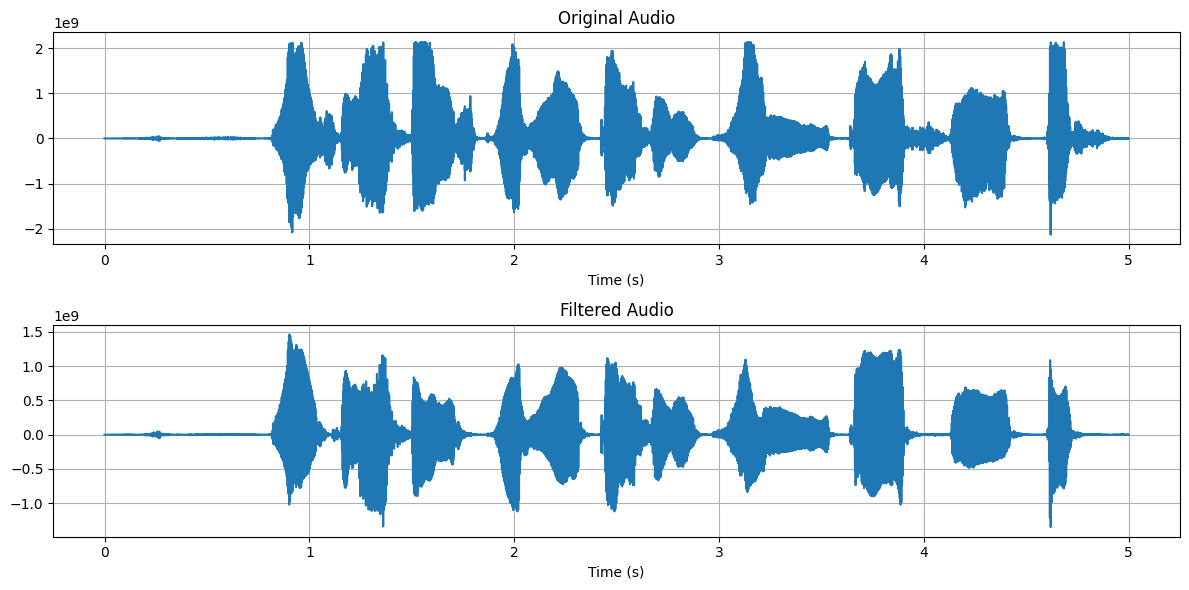

In [31]:
import numpy as np
from scipy.io import wavfile
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

#x: the input signal
#sr: sampling rate
#cutoff_frequency: frequency above this value->cutoff "change amplitude"
def low_pass_filter(x, sr, cutoff_frequency):
    # Design a low-pass filter
    # nyquist = sr\2 ->freq "min sample rate" 
    nyquist = 0.5 * sr
    # It specifies the critical frequencie lowpass filters. 0 < cf < 1
    normal_cutoff = cutoff_frequency / nyquist
    #1- 2 -> by trace it is used to specify the filter’s order raise -> low sound raise complexity raise power of filter.
    #2- critical frequencie
    #3- btype{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’},
    #In the context of a digital filter, the transfer function 
    #H(z) of a filter is represented in terms of its numerator and denominator as follows
    #numerator/denominator (‘ba’).
    b, a = sg.butter(2, normal_cutoff , btype='low')
    # Apply the filter
    x_filtered = sg.lfilter(b, a, x)
    # array of samples with filter
    return x_filtered

obj = wave.open("output3.wav", "rb")

def play(x, sr, autoplay=False):
    display(Audio(x, rate=sr, autoplay=autoplay))

# Example usage:
# Replace 'your_audio_file.wav' with the path to your audio file.
audio_file_path = 'output3.wav'

# Load the audio file
audio = pydub.AudioSegment.from_wav(audio_file_path)
x = np.array(audio.get_array_of_samples()) 
sr = audio.frame_rate

# Play the original audio
play(x, sr)

# Apply low-pass filter
cutoff_frequency = 500  # Adjust as needed
x_filtered = low_pass_filter(x, sr, cutoff_frequency)
# file name 
# sampling rate
# max amplitude  int16 -> 32767(max) wav "normalize signal"
wavfile.write('LPF_filttered.wav', sr, np.int16(x_filtered/np.max(np.abs(x_filtered)) * 32767))

# Play the filtered audio
play(x_filtered, sr)

# Plot the original and filtered signals
time = np.linspace(0, seconds, num=obj.getnframes())

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, x)
plt.title('Original Audio')
plt.xlabel('Time (s)')
#shape
plt.grid(True)
    
plt.subplot(2, 1, 2)
plt.plot(time, x_filtered)
plt.title('Filtered Audio')
plt.xlabel('Time (s)')
#shape
plt.grid(True)
# septate between two graphs
plt.tight_layout()
plt.show()

In [6]:
import speech_recognition as sr
# digital file
audio = sr.AudioFile("LPF_filttered.wav")
# object of recoginzer
r = sr.Recognizer()
#rew data of file
#simaler to try and catch and close resources
#renaming audio -> s "alise"
with audio as s:
    # audio file(digital) -> audio data(discrete)
    audio_data = r.record(s)

text = r.recognize_google(audio_data=audio_data,language='en-US')
print(text)

<class 'speech_recognition.AudioFile'>
this is my first audio recording 123
